<a href="https://colab.research.google.com/github/SeongYunHong/Mirae-Python/blob/main/07_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#colab : linux -> ubuntu 22.04 lts버전
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


In [2]:
import pandas as pd #pandas 2.0 이후 (numpy, arrow(넘파이보다 빠름))
print(pd.__version__)

1.5.3


Series, Dataframe : 열 중심

In [29]:
import pandas as pd
data=pd.Series([0.25,0.5,0.75,1.0], index=['a','b','c','d']) #행 이름 : index
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [30]:
data['b'] #인덱스로 접근

0.5

In [31]:
data[1] #숫자로 접근

0.5

In [32]:
#ndarray+dict
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [33]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [34]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [35]:
data['e']=1.25

In [36]:
data['a':'c'] #숫자랑 다르게 키는 마지막이 생략 안됨

a    0.25
b    0.50
c    0.75
dtype: float64

In [37]:
data[0:2]

a    0.25
b    0.50
dtype: float64

In [38]:
data[['a','e']]

a    0.25
e    1.25
dtype: float64

In [39]:
#시리즈의 키 : 행 이름
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})

In [40]:
#데이터 프레임의 키 : 열 이름
data=pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [41]:
data['area'] #numpy에서는 행의 의미, pandas에서는 열의 의미
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [42]:
data['density']=data['pop']/data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [43]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [44]:
data.keys() #인덱스가 발달된 판다스 #문자열을 object로 인식

Index(['area', 'pop', 'density'], dtype='object')

In [45]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [46]:
data.values[0] #행

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [47]:
data.iloc[:3,:2 ] #행렬방식

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [48]:
data.loc['Illinois',:'pop']

area      149995.0
pop     12882135.0
Name: Illinois, dtype: float64

In [2]:
#data.iloc[:3,:'pop'] #섞어쓰면 에러

In [56]:
#문제
#density > 100 큰 'pop','density' 열을 출력하시오
#density의 California의 데이터를 90으로 수정하시오

data.loc[data.density.values>100,['pop','density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [58]:
data.loc["California","density"]=90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [68]:
import numpy as np
s=pd.Series(np.random.randn(5), index=['a','b','c','d','e'])
print(s)
print("-------------------------------/")
s.reindex(['e','b','f','d']) #순서 바꾸기 #f는 없는 데이터

a   -0.061997
b    2.678380
c    0.284991
d    0.115441
e    0.378185
dtype: float64
-------------------------------


e    0.378185
b    2.678380
f         NaN
d    0.115441
dtype: float64

In [61]:
ps=pd.Series(100,index=[10,11,12])
print(ps)
type(ps)

10    100
11    100
12    100
dtype: int64


pandas.core.series.Series

In [62]:
print(ps.dtype)
print(ps.shape)
print(ps.ndim)
print(ps.size)

int64
(3,)
1
3


In [67]:
#list -> ndarray -> Series
data=np.array(['a','b','c','d','a'])
s=pd.Series(data)
print("시리즈 데이터 : ",s.values)
print("시리즈 인덱스 : ",s.index) #RangeIndex 기본
print("시리즈 초기화 : ",s)
print("시리즈 인덱스의 값 : ",s.index.values) #인덱스 자체도 dict
print(s[0])
print(s.head()) #R
print(s.value_counts()) #키별로 도수분포표
print(s.value_counts(normalize=True))
print("-------------------------------/")
print(s.describe()) #count unique top frequency(도수)
print("-------------------------------/")
print("데이터 타입 : ",s.dtypes)
print("차원 : ",s.ndim)
print("차수 : ",s.shape)

시리즈 데이터 :  ['a' 'b' 'c' 'd' 'a']
시리즈 인덱스 :  RangeIndex(start=0, stop=5, step=1)
시리즈 초기화 :  0    a
1    b
2    c
3    d
4    a
dtype: object
시리즈 인덱스의 값 :  [0 1 2 3 4]
a
0    a
1    b
2    c
3    d
4    a
dtype: object
a    2
b    1
c    1
d    1
dtype: int64
a    0.4
b    0.2
c    0.2
d    0.2
dtype: float64
-------------------------------
count     5
unique    4
top       a
freq      2
dtype: object
-------------------------------
데이터 타입 :  object
차원 :  1
차수 :  (5,)


In [70]:
sdata={'Ohio':35000,'Texas':71000,'Oregon':16000,'Utah':5000}
obj3=pd.Series(sdata)
states=['California','Ohio','Oregon','Texas']
obj4=pd.Series(sdata, index=states)
print(obj4)
print("-------------------------------/")
print("null이 있는가 : ",pd.isnull(obj4))
print("-------------------------------/")
print("결측치가 없는가",pd.notnull(obj4))
print("-------------------------------/")
print("연산결과를 출력합니다 : ",obj3+obj4) #키는 연산에 모두 참여하고 하나라도 NaN가 있으면 결과도 NaN

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
-------------------------------
null이 있는가 :  California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
-------------------------------
결측치가 있는가 California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
-------------------------------
연산결과를 출력합니다 :  California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [72]:
s=pd.Series(['A','B','Aaba'])
s.str.count('a') #벡터화 연산 : 고속으로 문자열 처리
#문자열 함수 : find, replace, count. upper. lower

0    0
1    0
2    2
dtype: int64

In [127]:
from sklearn.datasets import load_iris
iris=load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [128]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [129]:
#행 이름 : index
#열 이름 : columns
#data 독립변수, target 종속변수

iris=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target']) #np.c_ : column으로 합침 #np.c_[iris['data'],iris['target']] 두개 합침
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [130]:
iris.info() #인덱스 정보, 컬럼 정보, 데이터 타입, 메모리 사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [131]:
iris.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Name']
iris['Name']=iris['Name'].astype('int32')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


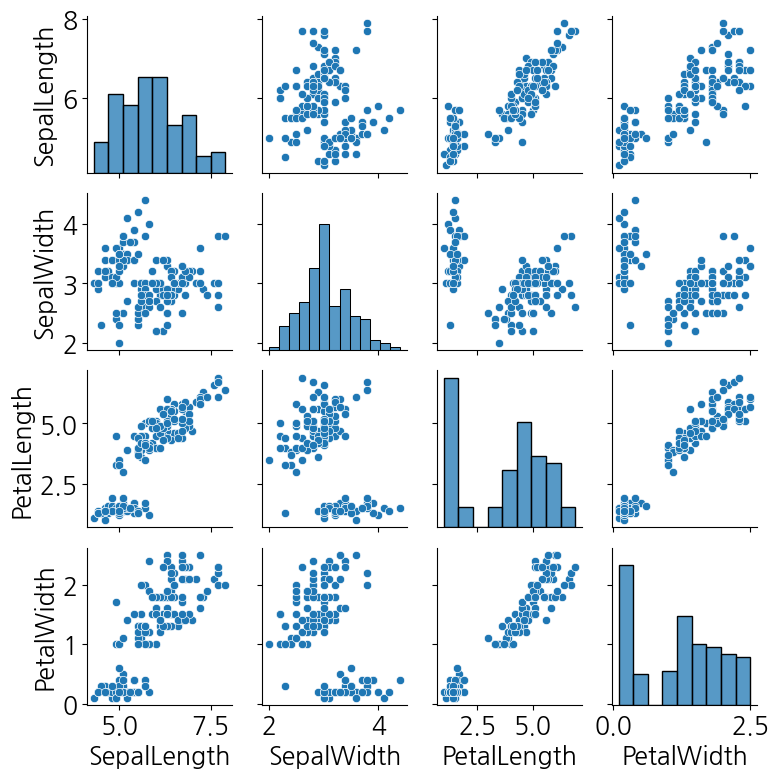

In [134]:
import seaborn as sns
sns.pairplot(iris.iloc[:,:4],height=2)

In [81]:
iris["sepal_ratio"]=iris['SepalWidth']/iris['SepalLength']
iris.head()

<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

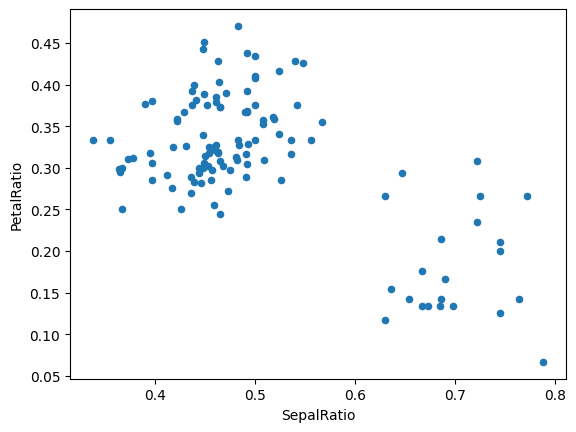

In [86]:
#chainig : optimization
iris.query('SepalLength>5').assign(SepalRatio=lambda x:x.SepalWidth/x.SepalLength, #assign : 변수 추가
                                   PetalRatio=lambda x:x.PetalWidth/x.PetalLength,).plot(kind='scatter',x='SepalRatio',y='PetalRatio')

In [2]:
#문제
#'Name':pd.Series(['김하나','이하나','삼하나','사하나','오하나', '육하나','칠하나', '팔하나']
#'Age':pd.Series([25,26,25,23,30,29,23])
#'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])

#위 3가지 시리즈로 데이터 프레임을 생성하시오
#데이터 타입을 확인하시오
#차원을 확인하고 차수를 확인하시오
#전체 데이터 요소 사이즈를 확인하시오
#값들만 출력해보시오

In [153]:
data={'Name':pd.Series(['김하나','이하나','삼하나','사하나','오하나', '육하나','칠하나', '팔하나']),
'Age':pd.Series([25,26,25,23,30,29,23]),
'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

In [154]:
df=pd.DataFrame(data)
df

,Name,Age,Rating
0,김하나,25.0,4.23
1,이하나,26.0,3.24
2,삼하나,25.0,3.98
3,사하나,23.0,2.56
4,오하나,30.0,3.20
5,육하나,29.0,4.60
6,칠하나,23.0,3.80
7,팔하나,NaN,NaN


In [155]:
df.info()
print("-------------------------------/")
print("데이터 타입 : ",df.dtypes)
print("-------------------------------/")
print("차원 : ",df.ndim)
print("-------------------------------/")
print("차수 : ",df.shape)
print("-------------------------------/")
print("사이즈 : ",df.size)
print("-------------------------------/")
print("값 : ",df.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    8 non-null      object 
 1   Age     7 non-null      float64
 2   Rating  7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes
-------------------------------
데이터 타입 :  Name       object
Age       float64
Rating    float64
dtype: object
-------------------------------
차원 :  2
-------------------------------
차수 :  (8, 3)
-------------------------------
사이즈 :  24
-------------------------------
값 :  [['김하나' 25.0 4.23]
 ['이하나' 26.0 3.24]
 ['삼하나' 25.0 3.98]
 ['사하나' 23.0 2.56]
 ['오하나' 30.0 3.2]
 ['육하나' 29.0 4.6]
 ['칠하나' 23.0 3.8]
 ['팔하나' nan nan]]


In [158]:
print("축 : ",df.axes) #행과 열 인덱스 확인
print("-------------------------------/")
print("행 인덱스 : ",df.index)
print("-------------------------------/")
print("열 인덱스 : ",df.columns)
print("-------------------------------/")
print("비었나 : ",df.empty)
print("-------------------------------/")
print(df.head(3))
print("-------------------------------/")
print(df.tail(2))

축 :  [RangeIndex(start=0, stop=8, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]
-------------------------------
행 인덱스 :  RangeIndex(start=0, stop=8, step=1)
-------------------------------
열 인덱스 :  Index(['Name', 'Age', 'Rating'], dtype='object')
-------------------------------
비었나 :  False
-------------------------------
  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
-------------------------------
  Name   Age  Rating
6  칠하나  23.0     3.8
7  팔하나   NaN     NaN


In [159]:
#열 합계 numeric_only deprecated됨 사용하지 말것
print("합계 : ",df.sum(axis=0)) #수치데이터만 적용 #axis=0 행, axis=1 열
print("-------------------------------/")
print("상관계수 : ",df.corr())
print("-------------------------------/")
print("평균 : ",df.mean(axis=0))
print("-------------------------------/")
print("표준편차 : ",df.std(axis=0))

합계 :  Name      김하나이하나삼하나사하나오하나육하나칠하나팔하나
Age                          181.0
Rating                       25.61
dtype: object
-------------------------------
상관계수 :               Age    Rating
Age     1.000000  0.259006
Rating  0.259006  1.000000
-------------------------------
평균 :  Age       25.857143
Rating     3.658571
dtype: float64
-------------------------------
표준편차 :  Age       2.734262
Rating    0.698628
dtype: float64


<ipython-input-159-e06181b5ca75>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("상관계수 : ",df.corr())
<ipython-input-159-e06181b5ca75>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("평균 : ",df.mean(axis=0))
<ipython-input-159-e06181b5ca75>:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("표준편차 : ",df.std(axis=0))


In [105]:
#디폴트는 수치 데이터만 봄
print(df.describe()) #count, mean, std, min, 25%, 50%, 75%, max

             Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000


In [106]:
print("오브젝트",df.describe(include=['object']))

오브젝트        Name
count     8
unique    8
top     김하나
freq      1


In [107]:
print(df.describe(include='all')) #전필드에대한 정보 출

       Name        Age    Rating
count     8   7.000000  7.000000
unique    8        NaN       NaN
top     김하나        NaN       NaN
freq      1        NaN       NaN
mean    NaN  25.857143  3.658571
std     NaN   2.734262  0.698628
min     NaN  23.000000  2.560000
25%     NaN  24.000000  3.220000
50%     NaN  25.000000  3.800000
75%     NaN  27.500000  4.105000
max     NaN  30.000000  4.600000


In [110]:
#문제
#데이터 프레임으로 생성하시오
#행 인덱스 : ['one','two','three','four','five']
#state만 출력하시오
#debt 열을 추가하고 모든값을 16.5로 입력하시오
#파생변수 'estern'에 주소가 서울인가를 따져 서울은 True, 아니면 False를 입력하시오
#debt열에 대하여 (-1.2,-1.5,-1.7) index=['two','four','five']로 된 시리즈를 만들고 대체하시오
#합계를 출력하시오(의미있는 열에 대해서 합계)

In [135]:
data={'state':['경기','강원','서울','충북','인천'],'year':[2000,2001,2002,2001,2002],'pop':[1.5,1.7,3.6,2.4,2.9]}
df=pd.DataFrame(data,index=['one','two','three','four','five'])
df

,state,year,pop
one,경기,2000,1.5
two,강원,2001,1.7
three,서울,2002,3.6
four,충북,2001,2.4
five,인천,2002,2.9


In [136]:
print(df['state'])

one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object


In [137]:
df["debt"]=16.5
df.head()

,state,year,pop,debt
one,경기,2000,1.5,16.5
two,강원,2001,1.7,16.5
three,서울,2002,3.6,16.5
four,충북,2001,2.4,16.5
five,인천,2002,2.9,16.5


In [138]:
df['estern']=df.state=='서울'

In [139]:
val=pd.Series([-1.2,-1.5,-1.7],index=['two','four','five'])
df['debt']=val

In [140]:
print(df[['pop','debt']].sum(axis=0))

pop     12.1
debt    -4.4
dtype: float64


In [141]:
print(df.describe(include='all'))

       state        year       pop      debt estern
count      5     5.00000  5.000000  3.000000      5
unique     5         NaN       NaN       NaN      2
top       경기         NaN       NaN       NaN  False
freq       1         NaN       NaN       NaN      4
mean     NaN  2001.20000  2.420000 -1.466667    NaN
std      NaN     0.83666  0.864292  0.251661    NaN
min      NaN  2000.00000  1.500000 -1.700000    NaN
25%      NaN  2001.00000  1.700000 -1.600000    NaN
50%      NaN  2001.00000  2.400000 -1.500000    NaN
75%      NaN  2002.00000  2.900000 -1.350000    NaN
max      NaN  2002.00000  3.600000 -1.200000    NaN


In [142]:
df.state.value_counts() #도수분포표는 시리즈 데이터

경기    1
강원    1
서울    1
충북    1
인천    1
Name: state, dtype: int64

In [143]:
df.state.sort_index() #인덱스로 정렬하는데 state를 출력해라

five     인천
four     충북
one      경기
three    서울
two      강원
Name: state, dtype: object

In [144]:
df.sort_index() #행 인덱스를 기준으로 정렬

,state,year,pop,debt,estern
five,인천,2002,2.9,-1.7,False
four,충북,2001,2.4,-1.5,False
one,경기,2000,1.5,NaN,False
three,서울,2002,3.6,NaN,True
two,강원,2001,1.7,-1.2,False


In [145]:
df.sort_values(['year','pop']) #년도로 정렬한 후 pop으로 재정렬

,state,year,pop,debt,estern
one,경기,2000,1.5,NaN,False
two,강원,2001,1.7,-1.2,False
four,충북,2001,2.4,-1.5,False
three,서울,2002,3.6,NaN,True
five,인천,2002,2.9,-1.7,False


시간 인덱스

* pandas나 numpy는 ns(나노초)를 지원하고
* python core는 mm초 지원함

In [147]:
df=pd.DataFrame({'y':[1,2,3]}, index=pd.to_datetime(["2000-03-31 00:00:00","2000-05-31 00:00:00","2000-08-31 00:00:00"]))
print(df)
print(df.axes)
df.index=df.index.to_period("M") #Month #월까지만 출력
df

            y
2000-03-31  1
2000-05-31  2
2000-08-31  3
[DatetimeIndex(['2000-03-31', '2000-05-31', '2000-08-31'], dtype='datetime64[ns]', freq=None), Index(['y'], dtype='object')]


,y
2000-03,1
2000-05,2
2000-08,3


시각화 matplotlib.pyplot

저장 pickle





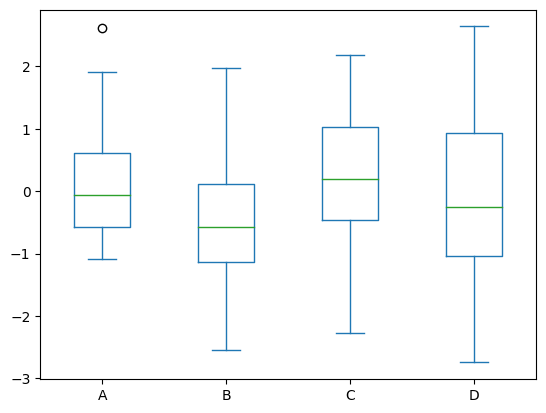

In [148]:
import matplotlib.pyplot as plt
data=np.random.randn(25,4)
df=pd.DataFrame(data,columns=list('ABCD'))
ax=df.plot.box()
plt.show()
df.to_pickle("./data.pkl") #메모리에 있는 내용을 그대로 저장
df=pd.read_pickle("./data.pkl")

In [161]:
data = {'name': ['하늘이', '찬호박', '우리야', '함께가', '하성공'],
'age': [40, 50, 30, 20, 70],
'preScore': [14, 28, 39, 25, 32],
'postScore': [20, 90, 55, 65, 79]}
df = pd.DataFrame(data,columns = ['name', 'age', 'preScore', 'postScore'])
df

,name,age,preScore,postScore
0,하늘이,40,14,20
1,찬호박,50,28,90
2,우리야,30,39,55
3,함께가,20,25,65
4,하성공,70,32,79


In [163]:
print(df['age'].sum())
print("-------------------------------/")
print(df['preScore'].mean())
print("-------------------------------/")
print(df['preScore'].cumsum())
print("-------------------------------/")
print(df['preScore'].describe())
print("-------------------------------/")
print(df['preScore'].var())
print("-------------------------------/")
print(df['preScore'].std())
print("-------------------------------/")
print(df['preScore'].skew()) #왜도 : 좌우대칭 0
print("-------------------------------/")
print(df['preScore'].kurt()) #척도 : 뽀족함 정도 3
print("-------------------------------/")

#pandas는 열중심
print(df.corr()) #상관계수
print("-------------------------------/")
print(df.cov())  #등분산

#numpy 행중심이기 때문에 전치해서 계산해줌
print("-------------------------------/")
print(np.cov(df[['age','preScore','postScore']].T))
print("-------------------------------/")
print(np.corrcoef(df[['age','preScore','postScore']].T))

210
-------------------------------/
27.6
-------------------------------/
0     14
1     42
2     81
3    106
4    138
Name: preScore, dtype: int64
-------------------------------/
count     5.0000
mean     27.6000
std       9.2358
min      14.0000
25%      25.0000
50%      28.0000
75%      32.0000
max      39.0000
Name: preScore, dtype: float64
-------------------------------/
85.30000000000001
-------------------------------/
9.235799911215056
-------------------------------/
-0.5110345040062979
-------------------------------/
0.8509652849263816
-------------------------------/
                age  preScore  postScore
age        1.000000  0.104135   0.387467
preScore   0.104135  1.000000   0.573134
postScore  0.387467  0.573134   1.000000
-------------------------------/
             age  preScore  postScore
age        370.0      18.5      200.5
preScore    18.5      85.3      142.4
postScore  200.5     142.4      723.7
-------------------------------/
[[370.   18.5 200.5]
 [ 18.5 

<ipython-input-163-955a8ae0dada>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()) #상관계수
<ipython-input-163-955a8ae0dada>:21: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.cov())  #등분산


In [2]:
#문제
#위 데이터를 데이터 프레임에 입력하시오
#2015-2018 증가율을 %로 변경하시오(소수점 3째자리에서 반올림해서 표현)
#2015-2017 증가율을 구해서 변수로 추가히시오
#                   지역      2018     2017     2016    2015   2015-2018 증가율
df=pd.DataFrame(data = {"서울" : ["수도권", 9904312, 9631482, 9762546, 9853972, 0.0283],
        "부산" : ["경상권", 3448737, 3393191, 3512547, 3655437, 0.0163],
        "인천" : ["수도권", 2890451, 2632035, 2517680, 2466338, 0.0982],
        "대구" : ["경상권", 2466052, 2431774, 2456016, 2473990, 0.0141]},index=['지역','2018','2017','2016','2015','2015-2018 증가율'])
df

,서울,부산,인천,대구
지역,수도권,경상권,수도권,경상권
2018,9904312,3448737,2890451,2466052
2017,9631482,3393191,2632035,2431774
2016,9762546,3512547,2517680,2456016
2015,9853972,3655437,2466338,2473990
2015-2018 증가율,0.0283,0.0163,0.0982,0.0141


In [6]:
df=df.T
df

,지역,2018,2017,2016,2015,2015-2018 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [ ]:
df['2015-2018 증가율']=df['2015-2018 증가율']*100

In [14]:
df["2015"]=df["2015"].astype('float')
df["2016"]=df["2016"].astype('float')
df["2017"]=df["2017"].astype('float')
df["2018"]=df["2018"].astype('float')
df["2015-2018 증가율"]=df["2015-2018 증가율"].astype('float')
df["2015-2017 증가율"]=((df["2017"]-df["2015"])/df["2015"]*100).round(2)

df

In [17]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop=pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [18]:
pop[('California',2010):('Texas',2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [19]:
pop.index

Index([('California', 2000), ('California', 2010),   ('New York', 2000),
         ('New York', 2010),      ('Texas', 2000),      ('Texas', 2010)],
      dtype='object')

In [21]:
index=pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [22]:
pop=pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [23]:
#stacking
pop[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [24]:
#index를 기준으로
pop_df=pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [26]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [27]:
pop_df=pd.DataFrame({'total':pop,'under18':[1,2,3,4,5,6]})
pop_df

total  under18
California 2000  33871648        1
           2010  37253956        2
New York   2000  18976457        3
           2010  19378102        4
Texas      2000  20851820        5
           2010  25145561        6

In [2]:
#데이터에 함수 적용하기(apply : 열별 / applymap : 열별 요소별 / map : 시리즈)

In [31]:
Sample={'Value':[5.52132,6.572935,7.21,8.755,9.9989]}
df=pd.DataFrame(Sample,columns=['Value'])

print(df)
print("-------------------------------/")
df['Value'].round(decimals=3)
roundThree=np.round(df['Value'],decimals=3)
print(roundThree)
print("-------------------------------/")
print('올림',df['Value'].apply(np.ceil))
df['Value'].apply(np.floor)

      Value
0  5.521320
1  6.572935
2  7.210000
3  8.755000
4  9.998900
-------------------------------/
0    5.521
1    6.573
2    7.210
3    8.755
4    9.999
Name: Value, dtype: float64
-------------------------------/
올림 0     6.0
1     7.0
2     8.0
3     9.0
4    10.0
Name: Value, dtype: float64


0    5.0
1    6.0
2    7.0
3    8.0
4    9.0
Name: Value, dtype: float64

In [36]:
frame=pd.DataFrame((np.random.randn(4,3)),columns=list(['rain','income','tax']),index=['seoul','daejeon','incheon','daegu'])
print("absolute 함수 적용\n",np.abs(frame))

absolute 함수 적용
              rain    income       tax
seoul    1.114173  0.715073  0.299136
daejeon  1.002038  1.067368  0.229963
incheon  0.911459  0.783144  0.216541
daegu    1.122049  1.175003  0.012723


In [33]:
print(frame.apply(np.ptp,axis=0))
print(frame.apply(np.ptp,axis=1))

rain      2.713709
income    2.771269
tax       2.233853
dtype: float64
seoul      0.963365
daejeon    3.807765
incheon    1.450776
daegu      2.950036
dtype: float64


In [34]:
f=lambda x:x.max()-x.min()
print("함수 객체의 행 적용(열방향)",frame.apply(f,axis=0)) #print(frame.apply(np.ptp,axis=0))과 동일
print("함수 객체의 열 적용(행방향)",frame.apply(f,axis=1)) #print(frame.apply(np.ptp,axis=1))과 동일

함수 객체의 행 적용(열방향) rain      2.713709
income    2.771269
tax       2.233853
dtype: float64
함수 객체의 열 적용(행방향) seoul      0.963365
daejeon    3.807765
incheon    1.450776
daegu      2.950036
dtype: float64


In [35]:
def f(x): #열별로 받아서 처리
  return pd.Series([x.min(),x.max()],index=['min','max'])
print("함수 객체 적용 : ",frame.apply(f))

함수 객체 적용 :           rain    income       tax
min -1.829805 -0.566872 -0.255892
max  0.883904  2.204397  1.977960


In [37]:
format=lambda x:'%.2f' %x #개별적 요소
print(frame.applymap(format))

         rain income    tax
seoul    1.11   0.72   0.30
daejeon  1.00   1.07   0.23
incheon  0.91   0.78  -0.22
daegu    1.12   1.18  -0.01


In [40]:
print(frame['rain'].map(format)) #시리즈에 요소별로 적

seoul      1.11
daejeon    1.00
incheon    0.91
daegu      1.12
Name: rain, dtype: object


In [51]:
#python core + pandas를 이용해서 처리
#이름 국어 영어 수학 점수를 3명 입력받아서 데이터 프레임으로 변환하고 합계와 평균 출력(과목별 학생별 apply)
#데이터프레임을 합계를 기준으로 정렬하고 등수를 입력하시오
#과목별 분산과 표준편차를 구하시오(apply 적용)
#과목별 상관계수와 공분산을 구하시오

data={}
name=[]
kor=[]
mat=[]
eng=[]
for i in range(3):
  n=input("이름을 입력하시오 : ")
  k=int(input("국어 점수를 입력하시오 : "))
  m=int(input("수학 점수를 입력하시오 : "))
  e=int(input("영어 점수를 입력하시오 : "))
  name.append(n)
  kor.append(k)
  mat.append(m)
  eng.append(e)

  data = {'name' : name,'kor':kor,'mat':mat,'eng':eng}
df=pd.DataFrame(data)
df

이름을 입력하시오 : a
국어 점수를 입력하시오 : 12
수학 점수를 입력하시오 : 23
영어 점수를 입력하시오 : 34
이름을 입력하시오 : b
국어 점수를 입력하시오 : 34
수학 점수를 입력하시오 : 56
영어 점수를 입력하시오 : 67
이름을 입력하시오 : j
국어 점수를 입력하시오 : 45
수학 점수를 입력하시오 : 56
영어 점수를 입력하시오 : 67
    j
0  45
1  56
2  67


In [67]:
df['total']=df.kor+df.mat+df.eng

In [72]:
df['average']=(df.total/3).round(2)

In [73]:
df

,name,kor,mat,eng,total,average
0,a,12,23,34,69,23.00
1,g,43,2,1,46,15.33
2,h,5,3,2,10,3.33


In [96]:
students=[]
name=[]
for i in range(3):
  student=input("학생의 이름, 국어, 영어, 수학 점수를 입력하시오 : ")
  students.append(student.split(",")[1:])
  name.append(student.split(",")[0])

학생의 이름, 국어, 영어, 수학 점수를 입력하시오 : a,12,23,43
학생의 이름, 국어, 영어, 수학 점수를 입력하시오 : g,67,87,64
학생의 이름, 국어, 영어, 수학 점수를 입력하시오 : h,56,78,87


In [94]:
#to_numeric 에러 처리방법(ignore, raise, coerce 강제적으로 변경)

In [97]:
data=pd.DataFrame(students,columns=['국어','영어','수학'],index=name)
data['국어']=pd.to_numeric(data['국어'])
data['영어']=pd.to_numeric(data['영어'])
data['수학']=pd.to_numeric(data['수학'])
data

,국어,영어,수학
a,12,23,43
g,67,87,64
h,56,78,87


In [98]:
data["합계"]=data.iloc[:,:3].apply(lambda x : x.sum(),axis=1)
data

,국어,영어,수학,합계
a,12,23,43,78
g,67,87,64,218
h,56,78,87,221


In [99]:
data["평균"]=data.iloc[:,:3].apply(lambda x:x.mean(),axis=1).round(1)
#data["평균"]=data.iloc[:,3].apply(lambda x:x/3).round(1)

In [100]:
result=data.sort_values(by=['합계'], axis=0,ascending=False)
ser=pd.Series(np.arange(len(data))+1,index=result.index)
print(ser)
data['등수']=ser
data

h    1
g    2
a    3
dtype: int64


,국어,영어,수학,합계,평균,등수
a,12,23,43,78,26.0,3
g,67,87,64,218,72.7,2
h,56,78,87,221,73.7,1


In [101]:
result.iloc[:,:3].apply(lambda x:x.var(),axis=0)

국어     847.000000
영어    1200.333333
수학     484.333333
dtype: float64

In [102]:
result.iloc[:,:3].apply(lambda x:x.std(),axis=0)

국어    29.103264
영어    34.645827
수학    22.007574
dtype: float64

In [103]:
result.iloc[:,:3].cov()

,국어,영어,수학
국어,847.0,1006.500000,473.000000
영어,1006.5,1200.333333,592.833333
수학,473.0,592.833333,484.333333


In [104]:
result.iloc[:,:3].corr()

,국어,영어,수학
국어,1.000000,0.998208,0.738494
영어,0.998208,1.000000,0.777516
수학,0.738494,0.777516,1.000000


In [105]:
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fe=fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',name='NanumGothic')
fm.fontManager.ttflist.insert(0,fe)
plt.rcParams.update({'font.size':18,'font.family':'NanumGothic'})

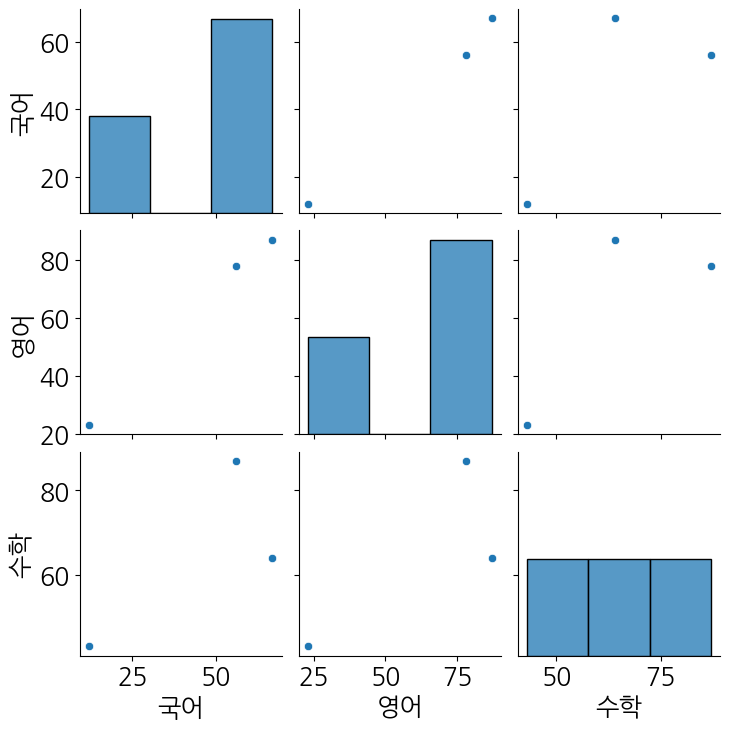

In [106]:
sns.pairplot(data.iloc[:,:3])

In [136]:
cor1=data.iloc[:,:3].corr()
cor1.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-136-bf75c715b001>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor1.style.background_gradient(cmap='coolwarm').set_precision(2)


,국어,영어,수학
국어,1.00,1.00,0.74
영어,1.00,1.00,0.78
수학,0.74,0.78,1.00


In [109]:
!pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.5 MB/s eta 0:00:00


In [123]:
import pymysql
import numpy as np
import pandas as pd

conn=pymysql.connect(host="34.64.91.45",port=3306,user='root',passwd='Ghd832!@#',db='sungjuk',charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor)
cursor=conn.cursor() #클라이언트 커서
cursor.execute("select *from student")
rez=cursor.fetchall() #모든 데이터를 python core로
print("패치의 데이터타입",type(rez))

패치의 데이터타입 <class 'list'>


In [125]:
df=pd.DataFrame(rez)
print(df.describe())
print(df.dtypes)
print(df.shape)
df

           bunho         kor         mat         eng       total     average
count   8.000000    8.000000    8.000000    8.000000    8.000000    8.000000
mean    9.750000   96.500000   96.125000   95.000000  287.625000   95.873750
std     6.227818    7.010197    6.998724    8.652002   20.542204    6.847306
min     4.000000   81.000000   81.000000   81.000000  243.000000   81.000000
25%     5.750000   97.750000   96.750000   94.500000  286.000000   95.332500
50%     7.500000  100.000000   99.500000   99.500000  298.000000   99.330000
75%    11.500000  100.000000  100.000000  100.000000  300.000000  100.000000
max    20.000000  100.000000  100.000000  100.000000  300.000000  100.000000
bunho           int64
name           object
kor             int64
mat             int64
eng             int64
total           int64
average       float64
grade          object
schoolcode     object
dtype: object
(8, 9)


,bunho,name,kor,mat,eng,total,average,grade,schoolcode
0,4,김만덕,100,99,99,298,99.33,A,CH00000001
1,5,고려인,100,99,99,298,99.33,A,CH00000001
2,6,전공인,100,90,81,271,90.33,A,SE00000001
3,7,전공이,81,81,81,243,81.00,B,SE00000001
4,8,전공삼,91,100,100,291,97.00,A,CH00000001
5,9,전공사,100,100,100,300,100.00,A,CH00000001
6,19,안세영,100,100,100,300,100.00,A,CH00000001
7,20,김하성,100,100,100,300,100.00,A,CH00000001
